In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

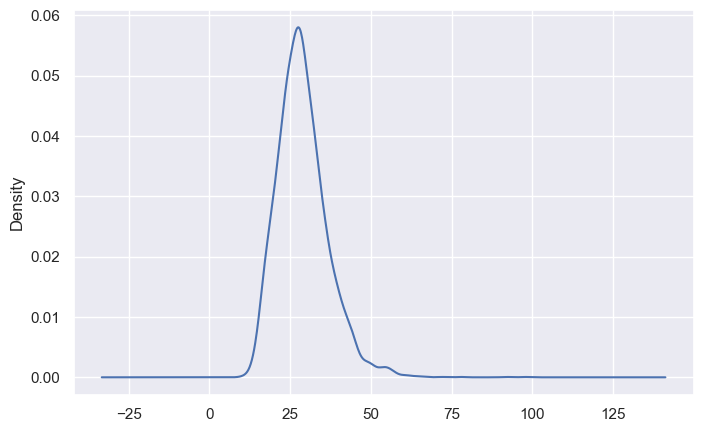

In [6]:
# Checking the distribution of the missing data column.

plt.figure(figsize=(8,5))
data['bmi'].plot(kind='kde')
plt.show()

Checking the distribution of the missing data column i.e bmi.

# Missing value Solution

In [7]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [8]:
# re-checking missing value

data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Droping unnecessary columns

In [9]:
data.drop(['id'], axis = 1, inplace=True)

In [10]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# EDA

## Target variable (Stroke)

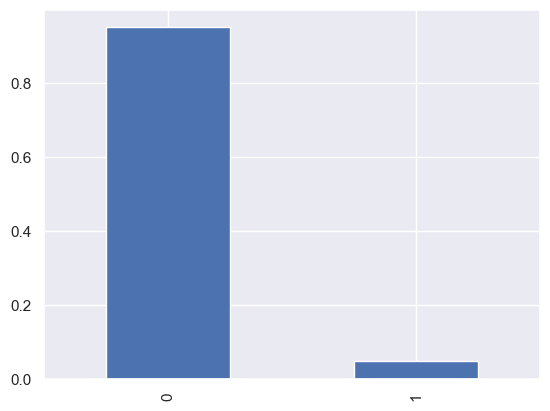

In [11]:
data['stroke'].value_counts(normalize=True).plot(kind='bar')
plt.show()

## Checking outliers in our dataset (Categorical columns)

In [12]:
num=data.select_dtypes(exclude='object')

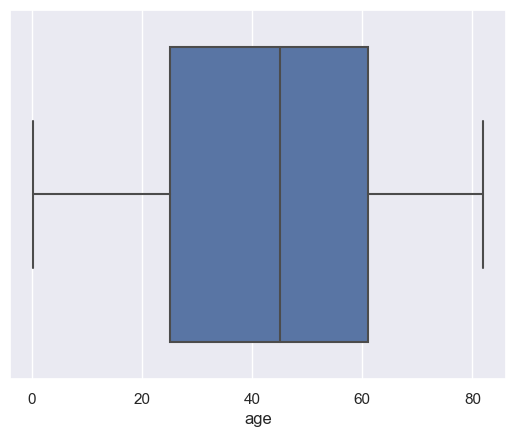

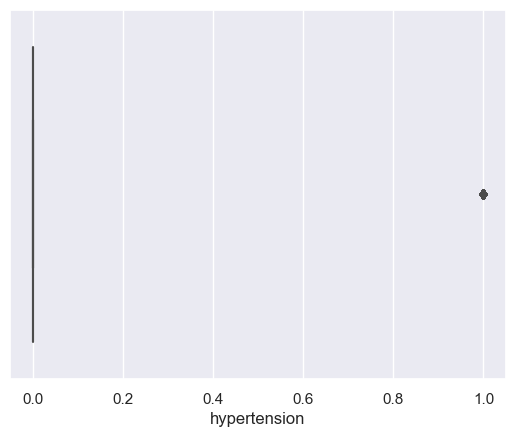

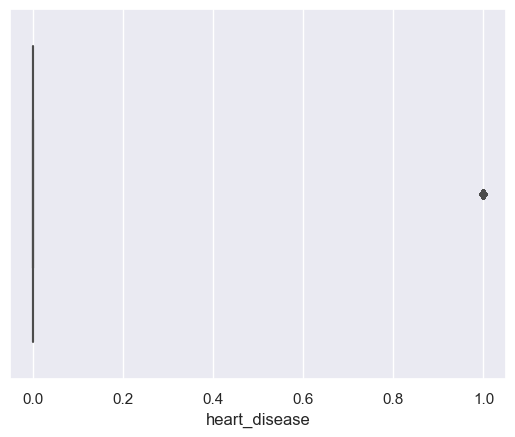

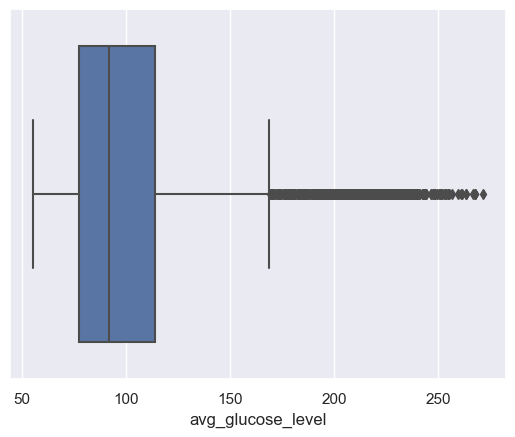

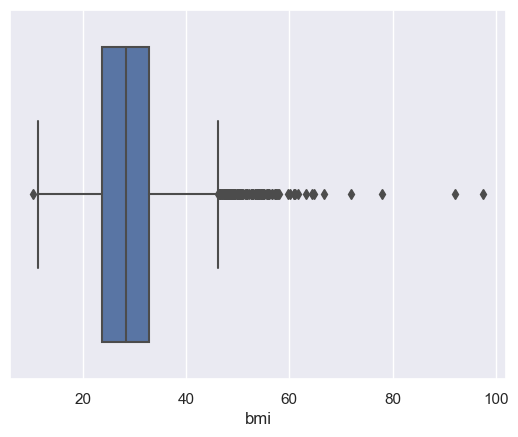

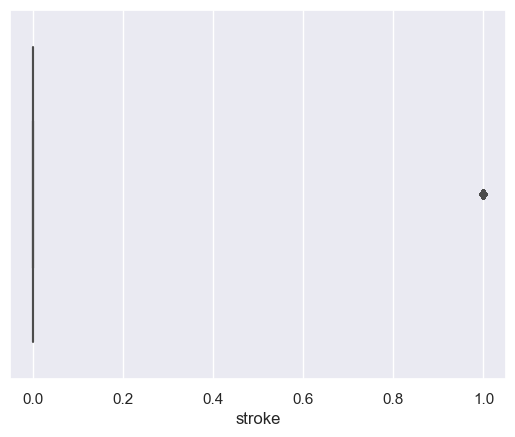

In [13]:
for i in num.columns:
    sns.boxplot(data=num,x=i)
    plt.show()

## Gender

In [14]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

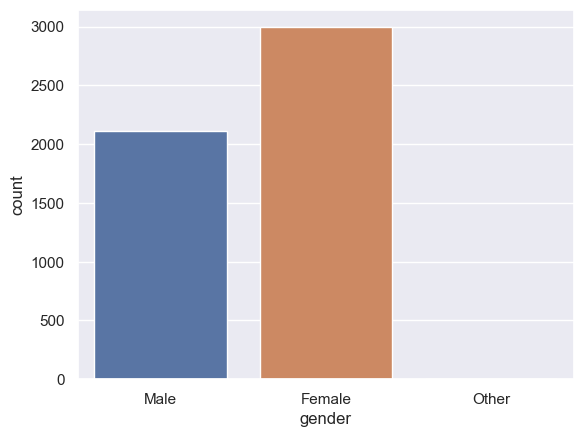

In [15]:
sns.countplot(data=data,x='gender')
plt.show()

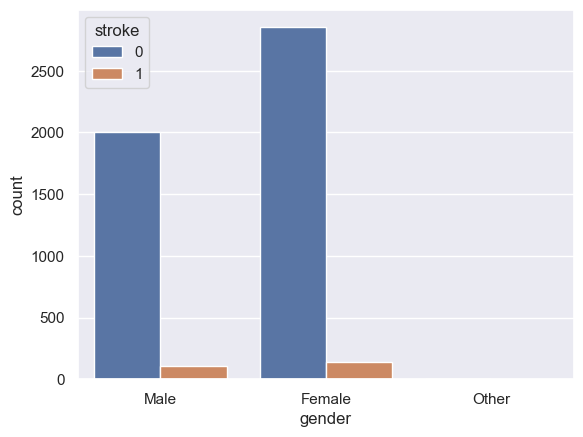

In [16]:
sns.countplot(data=data,x='gender',hue='stroke')
plt.show()

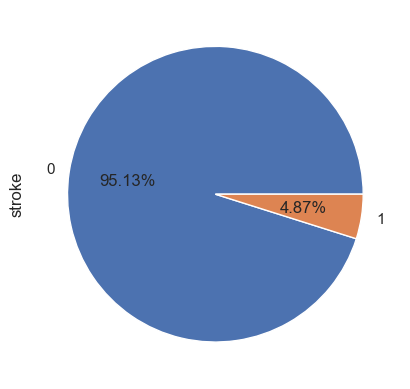

In [17]:
data['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

## Age

In [18]:
# More men than women had strokes
data.groupby('gender').mean()[['age', 'stroke']]

,age,stroke
gender,,
Female,43.757395,0.047094
Male,42.483385,0.051064
Other,26.000000,0.000000


More men than women had stroke attack.

## Ever married

In [19]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

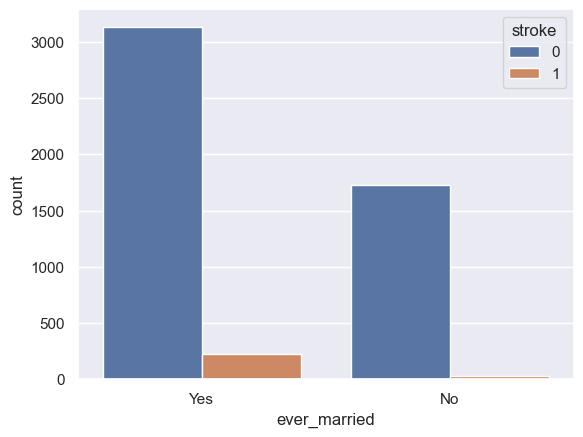

In [20]:
sns.countplot(data=data,x='ever_married',hue='stroke')
plt.show()

## Work Type

In [21]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [22]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

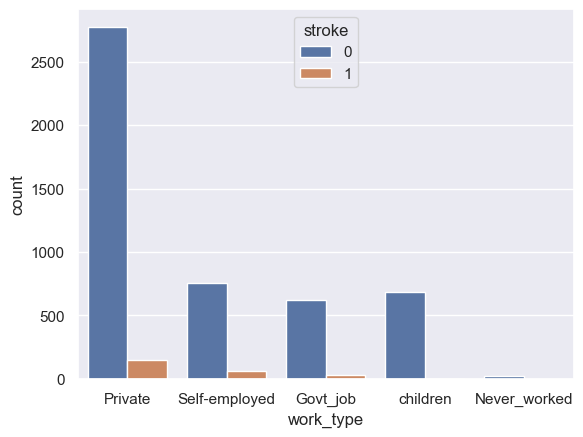

In [23]:
sns.countplot(data=data,x='work_type',hue='stroke')
plt.show()

## Residence Type

In [24]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [25]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

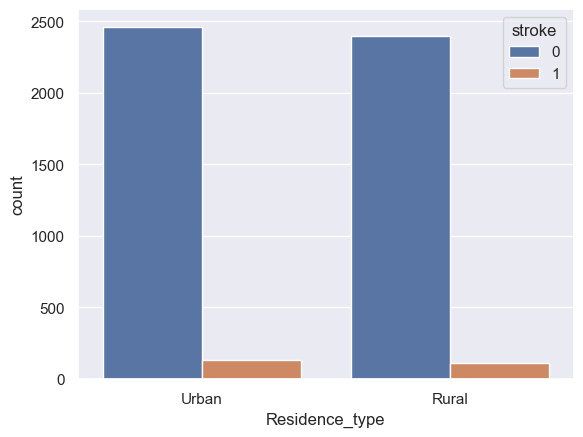

In [26]:
sns.countplot(data=data,x='Residence_type',hue='stroke')
plt.show()

## Smoking Features

In [27]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

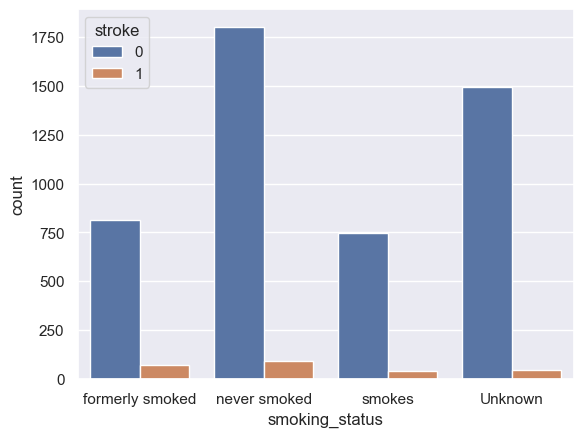

In [28]:
sns.countplot(data=data,x='smoking_status',hue='stroke')
plt.show()

# Heatmap

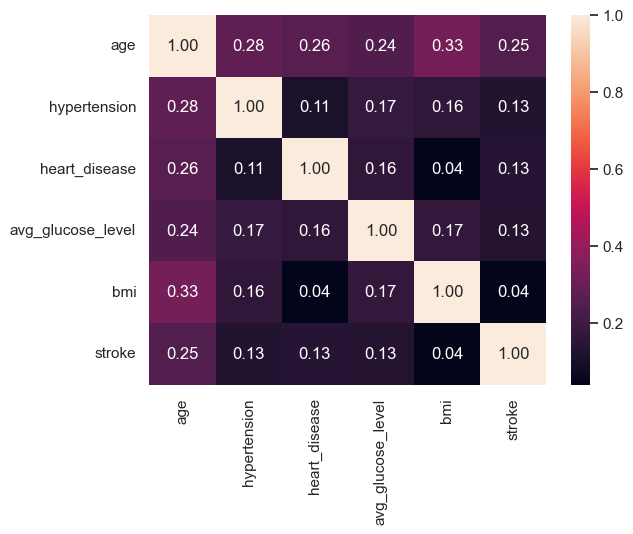

In [29]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

# Encoding the categorical variables

In [30]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [32]:
data['gender'] = lr.fit_transform(data['gender'])
data['ever_married'] = lr.fit_transform(data['ever_married'])
data['work_type'] = lr.fit_transform(data['work_type'])
data['Residence_type'] = lr.fit_transform(data['Residence_type'])
data['smoking_status'] = lr.fit_transform(data['smoking_status'])

# Split

In [33]:
X=data.drop('stroke',axis=1).values
X

array([[  1.        ,  67.        ,   0.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  0.        ,  61.        ,   0.        , ..., 202.21      ,
         28.89323691,   2.        ],
       [  1.        ,  80.        ,   0.        , ..., 105.92      ,
         32.5       ,   2.        ],
       ...,
       [  0.        ,  35.        ,   0.        , ...,  82.99      ,
         30.6       ,   2.        ],
       [  1.        ,  51.        ,   0.        , ..., 166.29      ,
         25.6       ,   1.        ],
       [  0.        ,  44.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [34]:
Y=data['stroke'].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
# splitting

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
classifier = LogisticRegression()

In [39]:
classifier.fit(X_train, Y_train)

LogisticRegression()

In [40]:
predict = classifier.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

# Evaluation for Logistic Regression

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
print(confusion_matrix(Y_test, predict))

[[968   0]
 [ 54   0]]


In [44]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [45]:
print('Accuracy score :',accuracy_score(Y_test, predict))

Accuracy score : 0.9471624266144814


# KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [49]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

# Evaluation for KNN Classifier

In [51]:
print('Accuracy:',accuracy_score(Y_test, pred))

Accuracy: 0.9422700587084148


# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
classifier = DecisionTreeClassifier(max_depth=3)

In [54]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

# Evaluation for Decision Tree Classifier

In [57]:
print('Accuracy:',accuracy_score(Y_test, Y_pred))

Accuracy: 0.9461839530332681


## Ploting Tree with plot_tree

In [58]:
from sklearn import tree

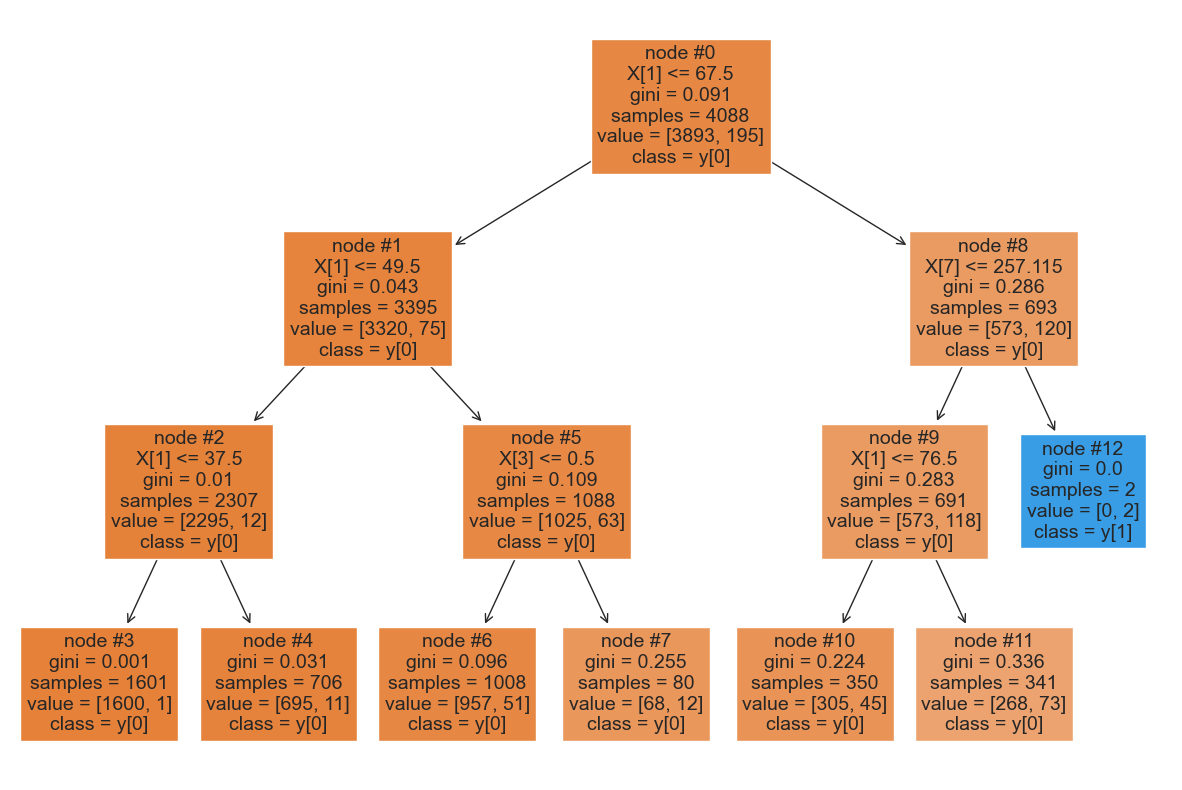

In [59]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,class_names=True,node_ids=True)
plt.show()

# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
classifier = RandomForestClassifier()

In [62]:
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [63]:
Y_pred1 = classifier.predict(X_test)
Y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## Evaluation for Random Forest Classifier

In [65]:
print('Accuracy:', accuracy_score(Y_pred1, Y_test))

Accuracy: 0.9461839530332681
